In [22]:
import numpy as np
import pandas as pd
# import datacontrol
import sklearn
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import time
# import validation
import csv 

In [38]:
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import RepeatedKFold

In [23]:
# import keras
import pandas as pd
import numpy as np
import sklearn.preprocessing
from sklearn.utils import shuffle
# from keras.constraints import max_norm


In [24]:
# Definisco gli Iper Parametri
gamma_range = [0.05, 0.07, 0.09]

C_costant =  np.linspace(3, 20, 80)
d_degree =[1] #HP for the Poly
coef_r= [1]  # only in ply and sigmoid!
epsilon = [0.1]
kernels = ['rbf']

In [39]:
def CSV_to_array(file_name, shuf=False, delimiter=',', comment='#'):
    dataframe = pd.read_csv(file_name, delimiter = delimiter, comment=comment)
    if shuf :
        dataframe = shuffle(dataframe)
        dataframe = dataframe.reset_index(drop=True)
    array = dataframe.values[:,1:]
    return array

In [40]:
train_array = CSV_to_array('./Scrivania/ML_project-master/Monk_dataset/monks-1.train', shuf = True, delimiter = ' ')
# test_array = CSV_to_array('./Monk_dataset/monks-1.test', shuf = True, delimiter = ' ')
x_train = train_array[:,1:7]
y_train = train_array[:,0]
y_train = y_train.reshape(y_train.shape[0],1)
x_test = test_array[:,1:7]
y_test = test_array[:,0]
y_test = y_test.reshape(y_test.shape[0],1)

In [41]:
def RepeatedKFoldCross(trainCallback, predictcallback, x_train, y_train, n_splits=5, preprocessing=True, n_repeats=4):
    kf = RepeatedKFold(n_repeats=n_repeats, n_splits=n_splits)
    if preprocessing:
        scaler = StandardScaler()
    valLoss = []
    TRLoss = []
    for train, test in kf.split(x_train):
        X_train, x_test, Y_train, y_test = x_train[train], x_train[test], y_train[train], y_train[test]
        if preprocessing:
            scaler.fit(X_train)
            X_train = scaler.transform(X_train)
            x_test = scaler.transform(x_test)
        trainCallback(X_train, Y_train)
        y_predicted = predictcallback(x_test)
        #mean euclidian error
        loss_val = MeanEuclidianError(y_predicted, y_test)
        loss_training = MeanEuclidianError(predictcallback(X_train), Y_train)
        valLoss.append(loss_val)
        TRLoss.append(loss_training)
        print(loss_val)
    return valLoss, TRLoss

In [42]:
def kFoldCross(trainCallback, predictcallback, x_train, y_train, n_splits=4, preprocessing = True):
    kf = KFold(n_splits=n_splits)
    if preprocessing:
        scaler = StandardScaler()
    valLoss = []
    TRLoss = []

    for train, test in kf.split(x_train):
        X_train, x_test, Y_train, y_test = x_train[train], x_train[test], y_train[train], y_train[test]
        if preprocessing:
            scaler.fit(X_train)
            X_train = scaler.transform(X_train)
            x_test = scaler.transform(x_test)
        trainCallback(X_train, Y_train)
        y_predicted = predictcallback(x_test)
        loss_val = MeanEuclidianError(y_predicted, y_test)
        loss_training = MeanEuclidianError(predictcallback(X_train), Y_train)
        valLoss.append(loss_val)
        TRLoss.append( loss_training)
    return valLoss, TRLoss
def MeanEuclidianError(X,Y):
    #x, y in R2
    #MEE = 1/N(sum(sqrt(x[i,0]-y[i,0]**2 + x[i,1]-y[i,1]**2))
    #can be weitten in a faster way as 1/N(sumnp.sqrt(float(x.dot(x)) - 2 * float(x.dot(y)) + float(y.dot(y))))
    out = 0    
    for x, y in zip(X, Y):
        out +=  np.linalg.norm(x-y)
    return out/(X.shape[0])

0.3568993269544537
0.4053300453760106
0.3443276364599346
0.445043810907567
0.3258126195649579
[0.35689933 0.40533005 0.34432764 0.44504381 0.32581262]
Test = 0.09 +/- 0.00
validation = 0.38 +/- 0.04


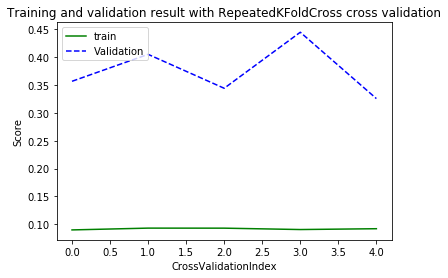

In [43]:

# it test the variance if we change the training /valiation division
def main():
    #data creation
#     try:
#         TrainingData = datacontrol.readFile("../data/Development.csv")
#     except:
#         TrainingData = datacontrol.readFile("data/Development.csv")
#     x_train, y_train = datacontrol.divide(TrainingData)
    svr = svm.SVR(kernel="rbf", gamma="scale", C=56)
    SVRegressor = MultiOutputRegressor(svr, n_jobs=2)
    # I can evaluate the model also with cross Validation
    # CrossValidationScores = cross_val_score(SVRegressor, x_train, y_train, cv=5)
    # I can evaluate the model with kfold validation
    valScore, TrainingScore = RepeatedKFoldCross(
        SVRegressor.fit, SVRegressor.predict,  x_train, y_train, n_repeats=1)
    valScore = np.array(valScore)
    TrainingScore = np.array(TrainingScore)
    print(valScore)
    print("Test = %.2f +/- %.2f" % (np.mean(TrainingScore), np.std(TrainingScore)))
    print("validation = %.2f +/- %.2f" % (np.mean(valScore), np.std(valScore)))
    test_dim = range(0, np.size(valScore))
    plt.plot(test_dim, TrainingScore, 'g', label='Training Score')
    plt.plot(test_dim, valScore, '--b', label='Validation Score')
    plt.title('Training and validation result with RepeatedKFoldCross cross validation')
    plt.xlabel('CrossValidationIndex')
    plt.ylabel('Score')
    plt.legend(['train', 'Validation'], loc='upper left')
    plt.show()

if __name__ == "__main__":
   main() 

In [19]:
y_test


array([[1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
    

In [20]:
def simulate(self, x_train, y_train, regression = True):
        writer = csv.writer(open("./Scrivania/ML_project-master/Monk_dataset/CSV_Results.csv", 'w'))
        writer.writerow(self.title)
        for simulation in self.HyperParameterArray:
            start_time = time.time()
            if regression:
                svr = svm.SVR(kernel=rbf, gamma=0.1, coef0=0.3, degree=0.2, C = 0.4, epsilon=0.5)

#                 svr = svm.SVR(kernel=simulation.kernel, gamma=simulation.gamma, coef0=simulation.coef, degree=simulation.degree, C = simulation.C, epsilon=simulation.epsilon)
                SVRegressor = MultiOutputRegressor(svr, n_jobs=8)
            else:
                SVRegressor = svm.SVC(kernel=simulation.kernel, gamma=simulation.gamma, coef0=simulation.coef, degree=simulation.degree, C = simulation.C)
            
            
            # I can evaluate the model also with cross Validation
            # CrossValidationScores = cross_val_score(SVRegressor, x_train, y_train, cv=5)
            # I can evaluate the model with kfold validation
            valScore, TrainingScore = validation.kFoldCross(
                SVRegressor.fit, SVRegressor.predict,  x_train, y_train, n_splits=self.kfoldDim)
            valScore = np.array(valScore)
            TrainingScore = np.array(TrainingScore)
            timeSimulation = abs(time.time()-start_time)
            simulation.SaveResult(valScore, TrainingScore, timeSimulation)
            print("\n")
            print("Validation error: %0.2f (+/- %0.2f)" % (valScore.mean(), valScore.std()*2))
            print("Training Error: %0.2f (+/- %0.2f)" %(TrainingScore.mean(), TrainingScore.std()*2))
            print("time = %0.2f" % timeSimulation)
            param = simulation.getValue()
            writer.writerow(param)

In [ ]:
    HP.simulate(x_train, y_train)

In [ ]:
HP.simulate(x_train, y_train)
HP.sort()    
HP.saveCSV()
